# Group A
## Team Raw Data

In [1]:
# install.packages("lubridate")
# install.packages("leaflet")
# install.packages("htmlwidgets")
# install.packages("magick")
# install.packages("rgl")

library(tidyverse)
library(skimr)
library(visdat)
library(leaflet)
library(htmlwidgets)
library(magick)
library(rgl)
library(lubridate)

package 'magick' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Andre-Fremaux\AppData\Local\Temp\RtmpsThbjt\downloaded_packages


also installing the dependencies 'miniUI', 'webshot', 'manipulateWidget'



package 'miniUI' successfully unpacked and MD5 sums checked
package 'webshot' successfully unpacked and MD5 sums checked
package 'manipulateWidget' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Andre-Fremaux\AppData\Local\Temp\RtmpsThbjt\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Linking to ImageMagick 6.9.9.14
Enabled features: cairo, freetype, fftw, ghostscript, lcms, pango, rsvg, webp
Disabled features: fontconfig, x11

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
#=========================================================================================
# Import and inspect earthquake data.
#=========================================================================================

earthquake_data <- read_csv("2015 - Geonet Earthquake Data.csv")

# Take a quick look to see what kind of entries and variable types we are dealing with.
glimpse(earthquake_data)

Parsed with column specification:
cols(
  .default = col_character(),
  origintime = col_datetime(format = ""),
  modificationtime = col_datetime(format = ""),
  longitude = col_double(),
  latitude = col_double(),
  magnitude = col_double(),
  depth = col_double(),
  usedphasecount = col_integer(),
  usedstationcount = col_integer(),
  magnitudestationcount = col_integer(),
  minimumdistance = col_double(),
  azimuthalgap = col_double(),
  originerror = col_double(),
  magnitudeuncertainty = col_double()
)
See spec(...) for full column specifications.


Observations: 931
Variables: 21
$ publicid              <chr> "2015p986126", "2015p986015", "2015p985702", ...
$ eventtype             <chr> NA, NA, NA, NA, "earthquake", NA, NA, "earthq...
$ origintime            <dttm> 2015-12-31 20:48:01, 2015-12-31 19:48:48, 20...
$ modificationtime      <dttm> 2015-12-31 20:50:58, 2015-12-31 19:51:04, 20...
$ longitude             <dbl> 172.4209, 173.8175, 173.0586, 173.0774, 171.3...
$ latitude              <dbl> -43.83825, -42.40701, -43.16447, -43.16501, -...
$ magnitude             <dbl> 2.115246, 2.120919, 2.451801, 2.268203, 3.003...
$ depth                 <dbl> 8.984375, 56.562500, 12.031250, 12.031250, 11...
$ magnitudetype         <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", ...
$ depthtype             <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ evaluationmethod      <chr> "NonLinLoc", "NonLinLoc", "NonLinLoc", "NonLi...
$ evaluationstatus      <chr> NA, NA, NA, NA, "confirmed", NA, NA, "confirm...
$ evaluationmode    

In [9]:
# Check to see some of the datas statistics and whether or not there is any missing data.
earthquake_data %>%
    skim() %>%
    kable()

Skim summary statistics  
 n obs: 931    
 n variables: 21    

Variable type: character

|     variable     | missing | complete |  n  | min | max | empty | n_unique |
|------------------|---------|----------|-----|-----|-----|-------|----------|
|    depthtype     |   910   |    21    | 931 | 17  | 17  |   0   |    1     |
|    earthmodel    |    0    |   931    | 931 |  6  |  6  |   0   |    2     |
| evaluationmethod |    0    |   931    | 931 |  6  |  9  |   0   |    2     |
|  evaluationmode  |    0    |   931    | 931 |  6  |  9  |   0   |    2     |
| evaluationstatus |   609   |   322    | 931 |  9  |  9  |   0   |    1     |
|    eventtype     |   607   |   324    | 931 | 10  | 27  |   0   |    2     |
|  magnitudetype   |    0    |   931    | 931 |  1  |  3  |   0   |    3     |
|     publicid     |    0    |   931    | 931 | 11  | 11  |   0   |   931    |

Variable type: integer

|       variable        | missing | complete |  n  | mean  |  sd  | p0 | p25 | p50 | p75 | p100

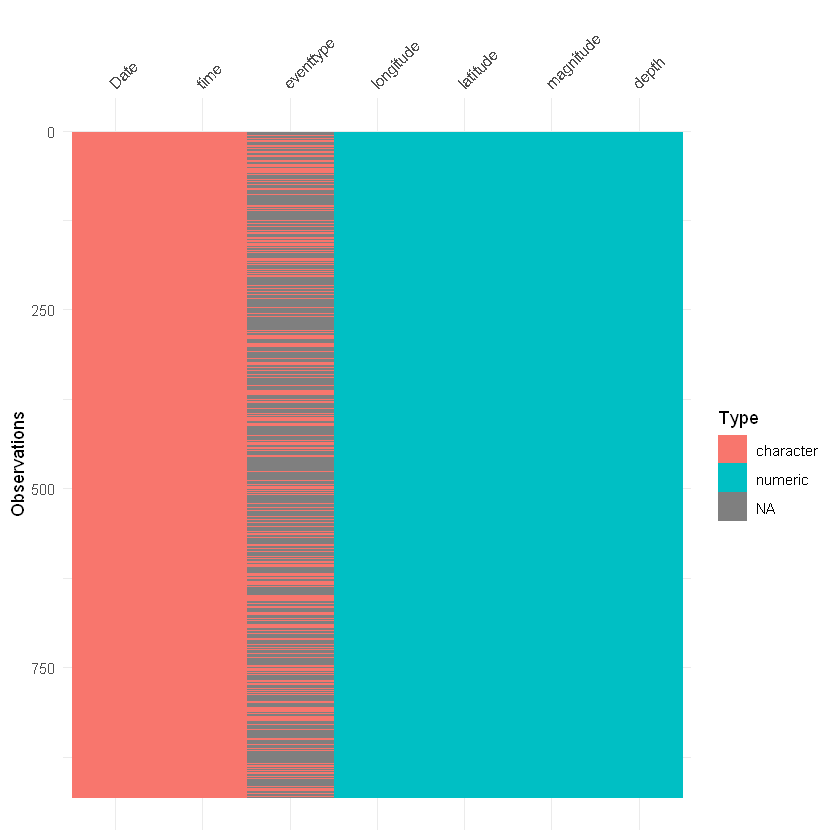

In [3]:
# Split origintime into date and time.
earthquake_data <- earthquake_data %>%
    mutate(Date = substr(origintime, 1, 10))

earthquake_data <- earthquake_data %>%
    mutate(time = substr(origintime, 11, 19))

# Select the collumns we need to use.
earthquake_data_small <- select(
    earthquake_data,
    "Date",
    "time",
    "eventtype",
    "longitude",
    "latitude",
    "magnitude",
    "depth"
)

# View the proportions of data types.
earthquake_data_small %>%
    vis_dat()

In [4]:
#=========================================================================================
# Import and wrangle earthquake data.
#=========================================================================================

victimisation_data <- read_csv("2015 - Victimisation in Canterbury.csv")

# Take a quick look to see what kind of entries and variable types we are dealing with.
glimpse(victimisation_data)

Parsed with column specification:
cols(
  .default = col_character(),
  `AU2014 (MB2014 GV Clipped.shp)` = col_integer(),
  Au2014 = col_integer(),
  `AU2014 code` = col_integer(),
  Cb2014 = col_integer(),
  `CB2014 code` = col_integer(),
  Con2014 = col_integer(),
  `CON2014 code` = col_integer(),
  Hour = col_integer(),
  `Row Totals` = col_integer(),
  `Calculation_676102955872370691 1` = col_integer(),
  `Calculation_676102955873337349 1` = col_integer(),
  Calculation_676102955875164168 = col_integer(),
  `Number of Victimisations` = col_integer(),
  `DHBCON code` = col_integer(),
  `DHB code` = col_integer(),
  Ged2007 = col_integer(),
  `GED2007 code` = col_integer(),
  `HDOM2006 code` = col_integer(),
  Land2014 = col_integer(),
  `MB2001 code` = col_integer()
  # ... with 39 more columns
)
See spec(...) for full column specifications.


Observations: 21,294
Variables: 110
$ `ANZSOC Division`                      <chr> "Theft and Related Offences"...
$ `ANZSOC Group`                         <chr> "Illegal Use of Property (Ex...
$ `Anzsoc Subdivision`                   <chr> "Illegal Use of Property (Ex...
$ `Area Unit`                            <chr> "St Albans East.", "Addingto...
$ `AU2014 (MB2014 GV Clipped.shp)`       <int> 592402, 594700, 594600, 5915...
$ Au2014                                 <int> 592402, 594700, 594600, 5915...
$ `AU2014 NAM (MB2014 GV Clipped.shp)`   <chr> "St Albans East", "Addington...
$ `Au2014 Nam`                           <chr> "St Albans East", "Addington...
$ `AU2014 code`                          <int> 592402, 594700, 594600, 5915...
$ `AU2014 label`                         <chr> "St Albans East", "Addington...
$ Cb2014                                 <int> 6001, 6006, 6006, 6005, 5903...
$ `Cb2014 Nam`                           <chr> "Shirley-Papanui Community",...
$ `CB2014 code` 

In [5]:
# Check to see some of the datas statistics and whether or not there is any missing data.
victimisation_data %>%
    skim() %>%
    kable()

Warning message in min(characters, na.rm = TRUE):
"no non-missing arguments to min; returning Inf"Warning message in max(characters, na.rm = TRUE):
"no non-missing arguments to max; returning -Inf"

Skim summary statistics  
 n obs: 21294    
 n variables: 110    

Variable type: character

|               variable               | missing | complete |   n   | min | max  | empty | n_unique |
|--------------------------------------|---------|----------|-------|-----|------|-------|----------|
|           ANZSOC Division            |    0    |  21294   | 21294 | 26  |  65  |   0   |    6     |
|             ANZSOC Group             |    0    |  21294   | 21294 | 14  |  52  |   0   |    17    |
|          Anzsoc Subdivision          |    0    |  21294   | 21294 |  7  |  52  |   0   |    9     |
|              Area Unit               |    0    |  21294   | 21294 |  5  |  29  |   0   |   246    |
|             AU2014 label             |    0    |  21294   | 21294 |  4  |  28  |   0   |   246    |
|              Au2014 Nam              |    3    |  21291   | 21294 |  4  |  28  |   0   |   244    |
|  AU2014 NAM (MB2014 GV Clipped.shp)  |    6    |  21288   | 21294 |  4  |  28  |   0   | 

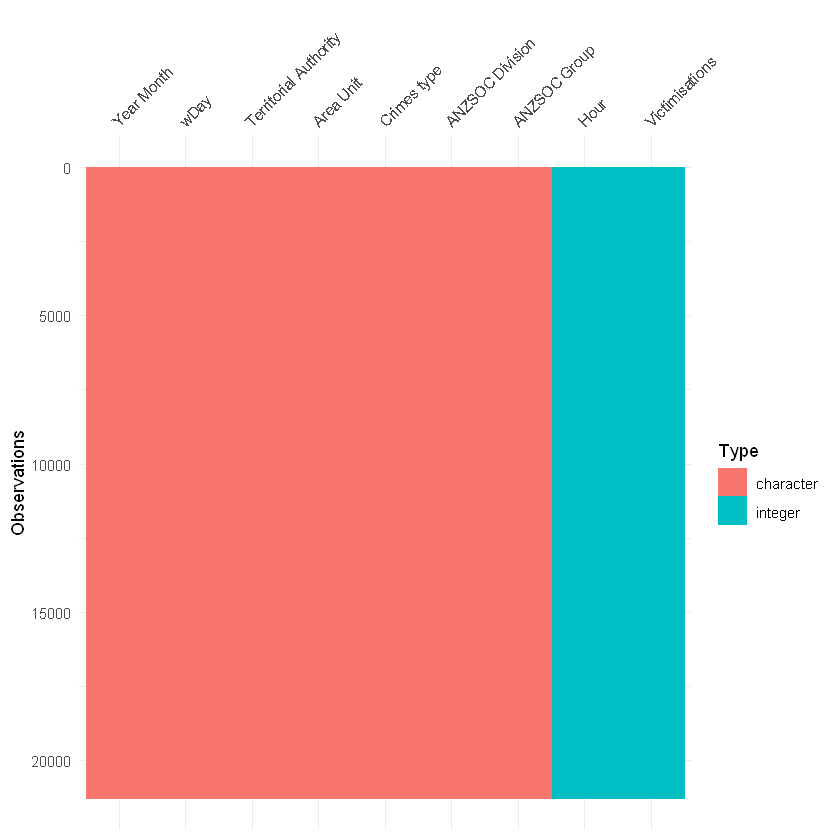

In [6]:
# Select the collumns we need to use.
victimisation_data_small <- select(
    victimisation_data,
    "Year Month",
    "Hour",
    "Occurrence Day Of Week",
    "Victimisations",
    "Territorial Authority",
    "Area Unit",
    "Crimes type",
    "ANZSOC Division",
    "ANZSOC Group"
)

# Rename Occurrence Day Of Week to a shorter and easier name to deal with.
victimisation_data_small <- rename(victimisation_data_small, wDay = "Occurrence Day Of Week")

# View the proportions of data types.
victimisation_data_small %>%
    vis_dat(warn_large_data=F)

In [7]:
#=========================================================================================
# Get the required crime data.
#=========================================================================================

# Get the number of victimisations and the days of the week while excluding unknown days.
crime_days <- victimisation_data_small %>%
    subset(wDay != "UNKNOWN") %>% 
    group_by(wDay) %>%
    summarise(Victimisations = sum(Victimisations))

# Rename wDay collumn to Date
names(crime_days)[1] <- "Date"

# Reorganize so that the days of the week are in correct order.
crime_days <- crime_days[c(2,6,7,5,1,3,4),]

# Print table.
crime_days


#=========================================================================================
# Get the required earthquake data.
#=========================================================================================

# Get all the data where the event type was registered as an earthquake
true_earthquakes <- earthquake_data_small %>%
    filter(earthquake_data_small$eventtype=="earthquake")

# Select the date, magnitude and depth collumns
quake_date <- select(true_earthquakes, c(Date, magnitude,depth))

# Get the day of the week from the date, group the data by each day and then get the number of Earthquakes and the mean magnitude and depth.
quake_date <- mutate(quake_date, Date=wday(Date)) %>%
    group_by(Date) %>%
    summarise(
        "Num Quakes" = NROW(Date),
        "Mean Magnitude" = mean(magnitude), 
        "Mean Depth" = mean(depth)
    )

# Get each day of the week as a string so that: Mon = 1, Tue = 2, ..., Sun = 7.
dow <- c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")
quake_date$Date <- dow[quake_date$Date]

# Print table.
quake_date


#=========================================================================================
# Create a new data frame.
#=========================================================================================

# Merge tables
full_table <- merge(crime_days, quake_date, by.x="Date", by.y="Date")

# Reorganize so that the days of the week are in correct order.
full_table <- full_table[c(2,6,7,5,1,3,4),]

# Remove row index numbers.
row.names(full_table) <- NULL

# Print table.
full_table

Date,Victimisations
Mon,1993
Tue,1921
Wed,1924
Thu,2021
Fri,2079
Sat,2299
Sun,2207


Date,Num Quakes,Mean Magnitude,Mean Depth
Mon,45,2.779115,17.56715
Tue,50,2.862623,15.41727
Wed,48,2.777747,18.77362
Thu,37,2.651080,12.22597
Fri,49,2.660788,14.93448
Sat,54,3.086621,23.45195
Sun,40,2.722031,18.47197


Date,Victimisations,Num Quakes,Mean Magnitude,Mean Depth
Mon,1993,45,2.779115,17.56715
Tue,1921,50,2.862623,15.41727
Wed,1924,48,2.777747,18.77362
Thu,2021,37,2.651080,12.22597
Fri,2079,49,2.660788,14.93448
Sat,2299,54,3.086621,23.45195
Sun,2207,40,2.722031,18.47197


In [39]:
#=========================================================================================
# Create Leaflet map.
#=========================================================================================

# Create a custom colour palette for the Leaflet map
pal <- colorNumeric(palette = c("#FF3366", "#AA3333", "#992222", "#661111", "#330000"), domain = true_earthquakes$depth)

# Create the Leaflet map
map_html <- leaflet(true_earthquakes) %>%
    addTiles() %>%
    addCircles(
        color = ~pal(depth),
        lng = ~longitude,
        lat = ~latitude,
        radius = ~magnitude*1000,
        weight = 1,
        popup = "",
        fillOpacity = 1
    )

# Save the map as an html file as we cannot run the map in Jupyter Lab
saveWidget(map_html, file="earthquake_map.html")

ERROR: Error in saveWidget(map_html, file = "earthquake_map.html"): Saving a widget with selfcontained = TRUE requires pandoc. For details see:
https://github.com/rstudio/rmarkdown/blob/master/PANDOC.md


In [14]:
#=========================================================================================
# Create 3d Graph.
#=========================================================================================

# Set the visual size of the graph and window.
par3d(cex=0.75)
par3d(windowRect = c(20, 30, 800, 800))

# Plot the 3d graph
plot3d(
    x = earthquake_data_small$latitude,
    y = earthquake_data_small$longitude,
    z = -(earthquake_data_small$depth),
    xlab = "Latitude",
    ylab = "Longitude",
    zlab = "Depth",
    col=rainbow(1000),
    radius = 2,
    size=7
)

# Display 3d graph in a popup window.
movie3d(
    spin3d(axis = c(0, 0, 1), rpm = 3),
    duration = 20, 
    dir = getwd(),
    type = "gif",
    clean = TRUE,
    fps = 25)

ERROR: Error in par3d(args, subscene = s): rgl device 7 cannot be found


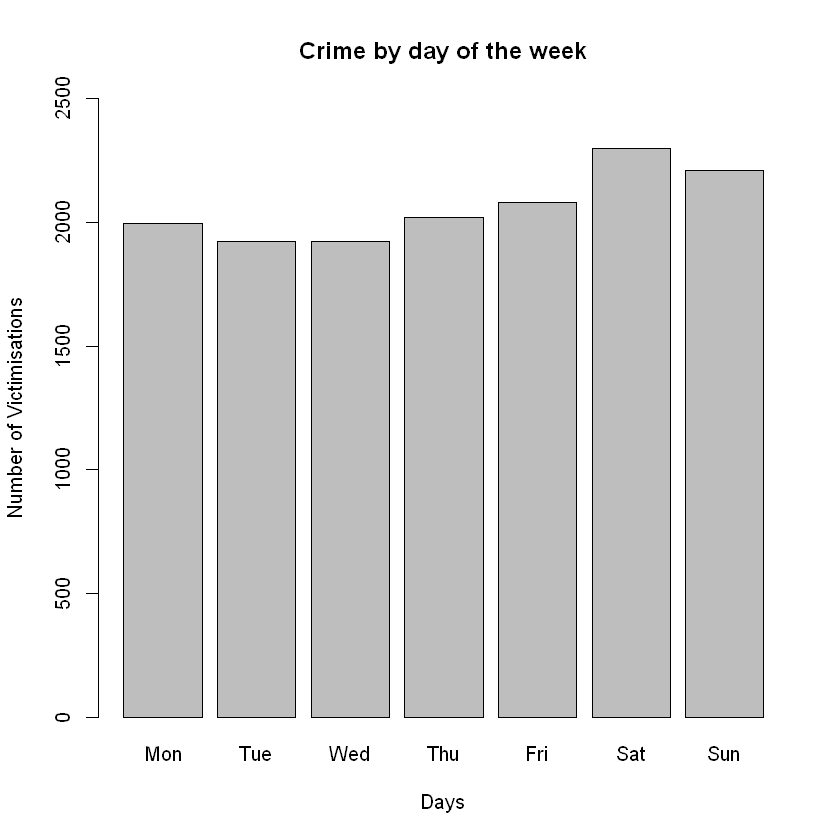

In [15]:
#=========================================================================================
# Create barplot for number of victimisations for each day of the week.
#=========================================================================================

barplot(
    crime_days$Victimisations,
    main="Crime by day of the week",
    xlab="Days",
    ylab="Number of Victimisations",
    names.arg=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"),
    ylim=c(0, 2500)
)

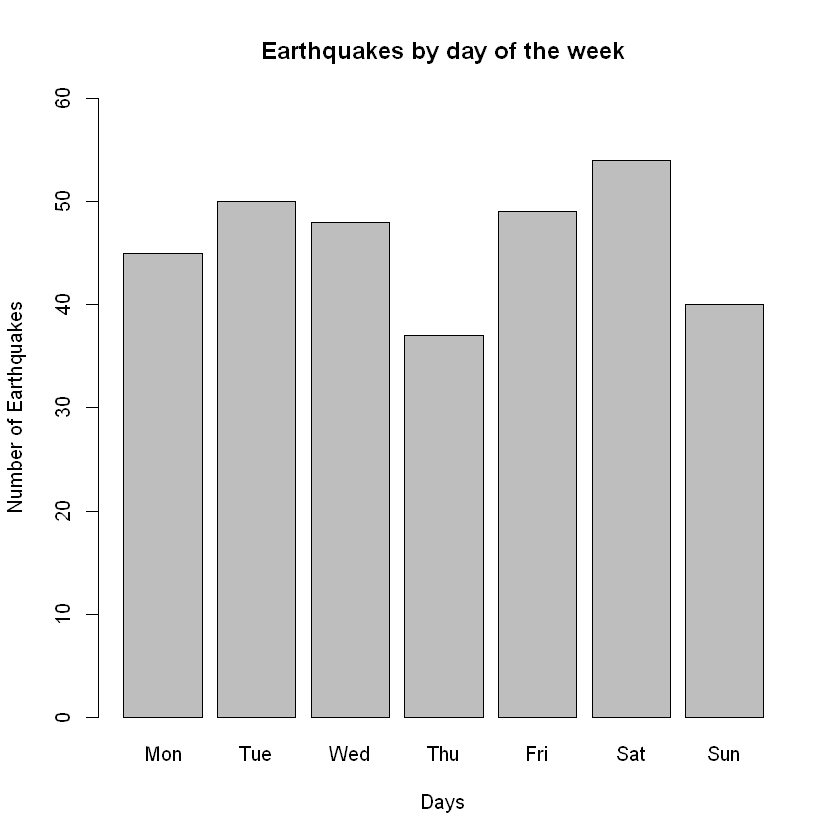

In [12]:
#=========================================================================================
# Create barplot for number of earthquakes for each day of the week.
#=========================================================================================

barplot(
    quake_date$"Num Quakes",
    main="Earthquakes by day of the week",
    xlab="Days",
    ylab="Number of Earthquakes",
    names.arg=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"),
    ylim=c(0, 60)
)

wDay,Average_Victimisations
Monday,1.047844
Tuesday,1.042322
Wednesday,1.054247
Thursday,1.064805
Friday,1.051593
Saturday,1.072795
Sunday,1.073966


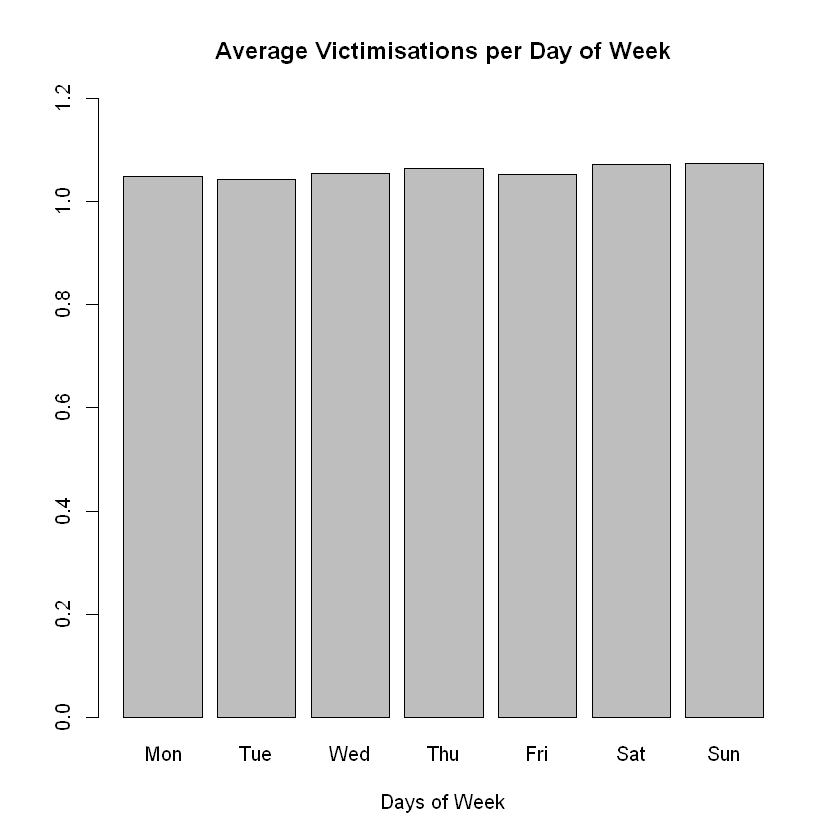

In [13]:
#=========================================================================================
# Create barplot for number of earthquakes for each day of the week.
#=========================================================================================

# Creates a new function for calculating the average victimisations per day of week.
# filtered is to select the day of week we want.
# total_vic is to sum up all victimisations that took place on the target day of week.
# total_day is the number of the targer day of week.
# average_num is the average victimisations per day of week.
average_victim <- function(data, target) {
    filtered <- data %>%
        filter(wDay == target)
    total_vic <- sum(filtered$Victimisations,na.rm=TRUE)
    total_day <- filtered %>%
        nrow()
    average_num <- total_vic / total_day
    return(average_num)
}

# Create a new data frame that contains days of week and relevant numbers of average victimisations.
victim_per_day <- data_frame(
    wDay = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"),
    Average_Victimisations = c(
        victimisation_data_small %>% average_victim(target = "Mon"),
        victimisation_data_small %>% average_victim(target = "Tue"),
        victimisation_data_small %>% average_victim(target = "Wed"),
        victimisation_data_small %>% average_victim(target = "Thu"),
        victimisation_data_small %>% average_victim(target = "Fri"),
        victimisation_data_small %>% average_victim(target = "Sat"),
        victimisation_data_small %>% average_victim(target = "Sun")
    )
)

# Print table.
victim_per_day

# Create a barplot graph based on the data frame above.
barplot(
    victim_per_day$Average_Victimisations,
    ylim=c(0, 1.2),
    main="Average Victimisations per Day of Week",
    xlab="Days of Week",
    names.arg=c("Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun")
)